In [1]:
#Khai báo các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Đọc dữ liệu đã được thu thập từ file supply-vn.csv thông qua thư viện pandas
df = pd.read_csv('supply-vn.csv')
df.head()

,ciphertext,username,title,description,top_skills,country,city,state,hourly_rate,primary_currency,combinedTotalEarnings,combinedTotalRevenue,totalJobsWorked,totalHourlyJobs
0,~015bfdb6374910f984,Vo N.,Architectural visualization and architectural ...,Dear !\nMy name is Vo Ny. I live in Vietnam. I...,"Autodesk 3ds Max, Autodesk AutoCAD, SketchUp, ...",Vietnam,Ho Chi Minh City,Ho Chi Minh,10.0,USD,NaN,NaN,55,8
1,~01519c2a9cb37ae905,Cong T.,Expert for PowerPoint | Microsoft,"Hello, I’m working as a PowerPoint expert at M...","Microsoft PowerPoint, Presentation Design, Gra...",Vietnam,Hanoi,Tay Ho,30.0,USD,35706.69,31847.09,26,9
2,~01416d9621d1598e03,Nemanja R.,Expert photoshop retoucher and photographer,I am a longtime photographer as well as a high...,"Retouching, Fashion Retouch, Photo Editing, Po...",Vietnam,Ho Chi Minh,Phu Nhuan,20.0,USD,6655.33,5455.58,24,43
3,~01d1198187badeb489,Bui H.,Vietnamese Translator/ Market Researcher / SEO...,"Hello,\nMy name is Hung from Vietnam.\nI am wi...","English to Vietnamese Translation, Data Entry,...",Vietnam,Hanoi,NaN,16.0,USD,169935.45,151081.64,583,79
4,~01ea599f137414da5b,Jenny N.,Professional translation and transcription ser...,"A Vietnamese born, British educated young prof...","English to Vietnamese Translation, Microsoft O...",Vietnam,Hanoi,Cau Giay,13.0,USD,1481.95,1186.76,18,3


In [3]:
# Xem thông tin về số cột và số dòng của tập dữ liệu đã thu thập.
df.shape

(1386, 14)

In [4]:
# Xem thông tin chi tiết về các cột dữ liệu.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ciphertext             1386 non-null   object 
 1   username               1386 non-null   object 
 2   title                  1385 non-null   object 
 3   description            1385 non-null   object 
 4   top_skills             1386 non-null   object 
 5   country                1386 non-null   object 
 6   city                   1384 non-null   object 
 7   state                  657 non-null    object 
 8   hourly_rate            1386 non-null   float64
 9   primary_currency       1386 non-null   object 
 10  combinedTotalEarnings  1326 non-null   float64
 11  combinedTotalRevenue   1326 non-null   float64
 12  totalJobsWorked        1386 non-null   int64  
 13  totalHourlyJobs        1386 non-null   int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 151.7+ 

In [5]:
# Kiểm tra dữ liệu bị thiếu của các cột. 
df.isnull().sum() 

ciphertext                 0
username                   0
title                      1
description                1
top_skills                 0
country                    0
city                       2
state                    729
hourly_rate                0
primary_currency           0
combinedTotalEarnings     60
combinedTotalRevenue      60
totalJobsWorked            0
totalHourlyJobs            0
dtype: int64

In [6]:
# Do cột state có quá nhiều dữ liệu bị thiếu (hơn 50%) nên ta loại bỏ cột này.
df = df.drop(['state'], axis=1)

In [7]:
# Kiểm tra dữ liệu sau khi đã loại bỏ cột state.
df.isnull().sum() 

ciphertext                0
username                  0
title                     1
description               1
top_skills                0
country                   0
city                      2
hourly_rate               0
primary_currency          0
combinedTotalEarnings    60
combinedTotalRevenue     60
totalJobsWorked           0
totalHourlyJobs           0
dtype: int64

In [8]:
 #Liệt kê số lượng người làm việc ở 10 tỉnh thành cao nhất.
df['city'].value_counts().head(10)

Ho Chi Minh City    396
Hanoi               265
Ho Chi Minh         176
Da Nang             104
Ha Noi              100
Nha Trang            20
Hue                  19
Can Tho              14
Bien Hoa             11
Danang               10
Name: city, dtype: int64

In [9]:
# Loại bỏ các giá trị NAN của cột city.
df = df.dropna(subset=['city']) 

# Lấy dữ liệu cột city chuyển hoá thành list để thuận tiện cho quá trình duyệt dữ liệu.
citys = df['city'].to_list()

# Chuẩn hoá dữ liệu cột thành phố.
for idx ,city in enumerate(citys):
    city = city.lower()
    if city.find('ho chi minh') != -1 or city.find('hcm') != -1 or city.find('hochiminh') != -1:
        city = 'Hồ Chí Minh'
    elif city.find('ha noi') != -1 or city.find('hn') != -1 or city.find('hanoi') != -1:
        city = 'Hà Nội'
    elif city.find('da nang') != -1:
        city = 'Đà Nẵng'
    else: 
        if city.find('nha trang') != -1:
            city = 'Nha Trang'
        else: city = 'Khác'
    citys[idx] = city
citys = pd.DataFrame(citys, columns=['city'])
citys

,city
0,Hồ Chí Minh
1,Hà Nội
2,Hồ Chí Minh
3,Hà Nội
4,Hà Nội
...,...
1379,Hà Nội
1380,Khác
1381,Hà Nội
1382,Hồ Chí Minh


In [10]:
# Liệt kê số lượng người làm việc ở các tỉnh thành.
provinces = citys.value_counts() 
provinces

city       
Hồ Chí Minh    618
Hà Nội         376
Khác           262
Đà Nẵng        108
Nha Trang       20
dtype: int64

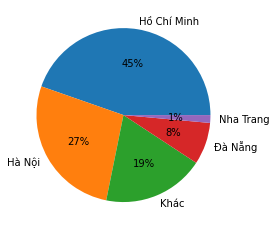

In [11]:
# Vẽ biểu đồ tròn thể hiện tỉ lệ phân bố người tìm việc ở khu vực Việt Nam.
y = provinces
my_labels = ['Hồ Chí Minh', 'Hà Nội', 'Khác', 'Đà Nẵng', 'Nha Trang']
plt.pie(y, labels=my_labels, autopct='%1.0f%%')
# plt.title("Tỉ Lệ Phân Bố Người Tìm Việc Ở Khu Vực Việt Nam.")
plt.show() 

In [12]:
#Gán lại cột citys sau khi đã chuẩn hoá vào lại df ban đầu.
df['city'] = citys['city'] 

# Tính thu nhập bình quân sau 1 giờ làm việc giữa các Tỉnh thành Việt Nam.
hourly_rate = df.groupby('city').mean()['hourly_rate'] 
hourly_rate

city
Hà Nội         18.907340
Hồ Chí Minh    20.751345
Khác           19.421303
Nha Trang      16.275000
Đà Nẵng        22.131944
Name: hourly_rate, dtype: float64

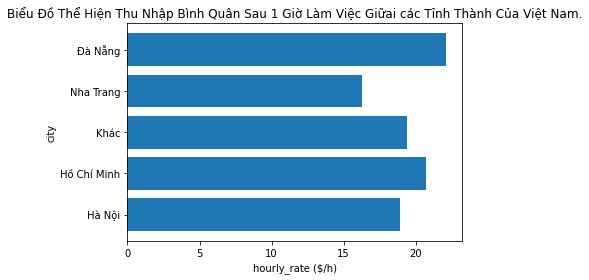

In [13]:
# Vẽ biểu đồ Thu nhập bình quân sau 1 giờ làm việc giữa các Tỉnh thành của Việt Nam.
y = ['Hà Nội', 'Hồ Chí Minh', 'Khác', 'Nha Trang', 'Đà Nẵng']
x = hourly_rate
plt.barh(y, x)
plt.xlabel('hourly_rate ($/h)')
plt.ylabel('city')
plt.title(label='Biểu Đồ Thể Hiện Thu Nhập Bình Quân Sau 1 Giờ Làm Việc Giữai các Tỉnh Thành Của Việt Nam.')
plt.show()

=> Dựa vào biểu đồ trên cho chúng ta thấy được rằng Đà Nẵng có mức thu nhập cao nhất và Nha Trang có mức thu nhập thấp nhất trong 1 giờ làm việc.

In [14]:
# Thống kê số người đã nhận được việc làm và số người không nhận được việc làm.

# Khởi tạo biến complted_jobs để đếm số người đã tìm được việc làm.
number_person_completed_jobs = 0
# Khởi tạo biến complted_jobs để đếm số người chưa tìm được việc làm.
number_person_without_completed_jobs = 0

# Khởi tạo cột dữ liệu Completed_Jobs để kiểm tra một người có tìm được việc làm hay không.
# Nếu đã tìm được việc làm thì gán giá trị 'Yes', ngược lại gán giá trị 'No' vào vị trí tương ứng.

# Chuyển kiểu dữ liệu cột Completed_Jobs sang danh sách để tiện cho quá trình duyệt dữ liệu.
Completed_Jobs = df['totalJobsWorked'].to_list()
for idx, person in enumerate(Completed_Jobs):
    if Completed_Jobs[idx] != 0:
        number_person_completed_jobs += 1
        # Gán giá trị 'Yes' vào vị trí tương ứng vào danh sách duyệt.
        Completed_Jobs[idx] = 'Yes' 
    else: 
        number_person_without_completed_jobs += 1
        # Gán giá trị 'No' vào vị trí tương ứng vào danh sách duyệt.
        Completed_Jobs[idx] = 'No'

# Sau khi đã duyệt xong danh sách ta tiến hành thêm danh sách vừa duyệt vào cột dữ liệu mới của Dataframe.
df['Completed_Jobs'] = Completed_Jobs

# Để thuận tiện cho việc vẽ biểu đồ tròn ta tiến hành chuyển hoá dữ liệu về kiểu series.
d = {'completed_jobs': number_person_completed_jobs, 'without_completed_jobs': number_person_without_completed_jobs}
series = pd.Series(data=d, index=['completed_jobs', 'without_completed_jobs'])
print(series)

completed_jobs            955
without_completed_jobs    429
dtype: int64


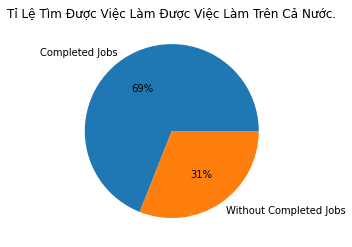

In [15]:
# Vẽ biểu đồ tròn thể hiện tìm được việc làm trên cả nước.
y = series
my_labels = ['Completed Jobs', 'Without Completed Jobs']
plt.pie(y, labels=my_labels, autopct='%1.0f%%')
plt.title("Tỉ Lệ Tìm Được Việc Làm Được Việc Làm Trên Cả Nước.")
plt.show() 

=> Có 31% người không tìm được việc trên nền tảng upwork và 69% số người tìm được việc trên nền tảng này.

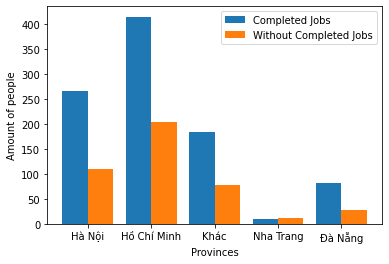

In [16]:
# Khởi tạo danh sách các thành phố để duyệt và vẽ biểu đồ.
areas = ['Hà Nội', 'Hồ Chí Minh', 'Khác', 'Nha Trang', 'Đà Nẵng']

# Khởi tạo một series rỗng
series1 = pd.Series(dtype='int64')

# Duyệt qua các thành phố và tính số lượng người đã tìm được việc và chưa tìm được việc.
for area in areas:
    # Khởi tạo hai biến dùng để đếm số người đã hoặc chưa tìm được việc.
    completed_jobs = 0
    without_completed_jobs = 0
    for index, row in df.iterrows():
        ''' Kiểm tra mỗi hàng của dữ liệu nếu trùng với thành phố đang xét
            và người đó đã tìm được việc thì biến đếm tăng lên 1 và ngược lại.
        '''
        if (row['city'] == area) and (row['Completed_Jobs'] == 'Yes'):
            completed_jobs += 1
        elif (row['city'] == area) and (row['Completed_Jobs'] == 'No'):
            without_completed_jobs += 1
    # Thêm dữ liệu ở mỗi tỉnh thành đã tính ở trên vào series.
    d = {'completed_jobs': completed_jobs, 'without_completed_jobs': without_completed_jobs}
    ser = pd.Series(data=d, index=['completed_jobs', 'without_completed_jobs'])
    # print(ser)
    series1 = series1.append(ser)

# print(series1)

# Vẽ biểu đồ.
X_axis = np.arange(len(areas))
  
plt.bar(X_axis - 0.2, series1['completed_jobs'], 0.4, label = 'Completed Jobs')
plt.bar(X_axis + 0.2, series1['without_completed_jobs'], 0.4, label = 'Without Completed Jobs')
plt.xticks(X_axis, areas)
plt.xlabel("Provinces")
plt.ylabel("Amount of people")
# plt.title("Number of people who have not found a job")
plt.legend()
plt.show()